# Leslie Matrix Analysis

A Leslie Matrix is a popular method in population ecology to determine the long-term distribution of a certain species of animal given the fecundity rates of the species and the initial population distribution. For example, the input file for this analyzer is an $(n+1)\times n$ matrix, where $n$ is the number of age classes in a species, and the $(n+1)$st row of the input file is the initial population distribution. Shown below is an example input text file.
```
0.0 5.0 4.0 2.5 1.0
0.6 0.0 0.0 0.0 0.0
0.0 0.5 0.0 0.0 0.0
0.0 0.0 0.4 0.0 0.0
0.0 0.0 0.0 0.6 0.0
1500 1000 1234 1234 3000
```
The first line gives the fecundity rates of the species, or the percent of females in that specific age class that will give birth to new animals or whatever.

The second line gives a single non-zero entry that tells us the survival rate from the first age group to the second.

The third line gives us a single non-zero entry that tells us the survival rate from the second age group to the third... etc.

The last line, as mentioned, gives the initial population distribution. The particular distribution shown has an initial population of, in each numbered age group:

```
1: 1500
2: 1000
3: 1234
4: 1234
5: 3000
```

The code analyzes the Leslie matrix and provides a small summary of the information provided by it. Additionally, the code also gves relevant eigenvectors and eigenvalues that specifically relate to the long-term population distribution which is usually of interest. A graph is also displayed of the population distribution of each age group for 100 population cycles.

Leslie Matrix:
  0.0   5.0   4.0   2.5   1.0    Fecundity Rates
  0.6   0.0   0.0   0.0   0.0    Percent of females that survive into class 2
  0.0   0.5   0.0   0.0   0.0    Percent of females that survive into class 3
  0.0   0.0   0.4   0.0   0.0    Percent of females that survive into class 4
  0.0   0.0   0.0   0.6   0.0    Percent of females that survive into class 5


Initial population distribution:
1500.0 Population in class 1
1000.0 Population in class 2
1234.0 Population in class 3
1234.0 Population in class 4
3000.0 Population in class 5


Relevant Eigenvalue:
1.927


Relevant Eigenvector:
-0.952
-0.296
-0.077
-0.016
-0.005


Long-Term Behavior:
-0.707 Percent of population in class 1
-0.220 Percent of population in class 2
-0.057 Percent of population in class 3
-0.012 Percent of population in class 4
-0.004 Percent of population in class 5


The population is growing exponentially because the positive eigenvalue is greater than one.



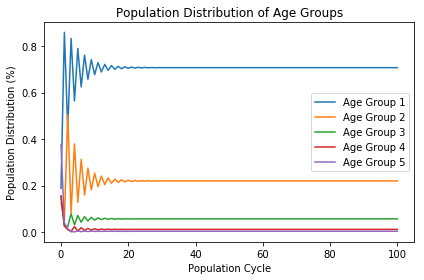

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from numpy.linalg import matrix_power
from itertools import cycle
from sklearn import preprocessing

#open the file and get the number of age groups
file = open('Leslie.txt')
lines = file.readlines()
N = len(lines)


#convert each line in the file to a list of floats
i = 0
for line in lines:
    line = line.split(' ')
    line = [float(i) for i in line]
    lines[i] = line
    i = i + 1
    
    
    
#creating the projection matrix and the initial population vector
projection = np.matrix(lines[0:N-1])
distribution = np.matrix(lines[N-1]).T
print('Leslie Matrix:')
for i in range(0, N-1):
    for j in range(0, N-1):
        print("%5.1f" % (projection[i,j]), end = " ")
    if i == 0:
        print("   Fecundity Rates")
    else:
        print("   Percent of females that survive into class " + str(i+1))

print('\n')
print("Initial population distribution:")
for i in range(0, N-1):
    print(distribution[i,0], end='')
    print(" Population in class " + str(i+1))
print('\n')    
    
    
#eigenvalues and eigenvectors of the projection matrix
eigvals, eigvecs = la.eig(projection)
eigvecs = np.real(eigvecs)
pos_index = -1 #the index of the relevant positive eigenvalue for population growth
index = 0

#according to the perron-frobenius theorem there should be some unique positive eigenvalue
for eigenvalue in eigvals:
    if eigenvalue > 0:
        pos_index = index
        break
    index = index + 1
relevant_eigenvalue = eigvals[pos_index]
relevant_eigenvector = eigvecs[:,pos_index]

print("Relevant Eigenvalue:")
print("%4.3f"%np.real(relevant_eigenvalue))
print('\n')
print('Relevant Eigenvector:')
for i in range(0, N-1):
    print("%4.3f"%relevant_eigenvector[i])
print('\n')
long_term_behavior = preprocessing.normalize(eigvecs.T, norm='l1')
print("Long-Term Behavior:")
for i in range(0, N-1):
    print("%4.3f"%long_term_behavior[pos_index][i], end=" ")
    print("Percent of population in class " + str(i+1))
print('\n')    
    
    
    
#determine whether the population is growing, declining, or stable
stability = ''
if eigvals[pos_index] > 1:
    stability = 'The population is growing exponentially because the positive eigenvalue is greater than one.'
elif eigvals[pos_index] < 1:
    stability = 'The population is decaying exponentially because the positive eigenvalue is less than one.'
else:
    stability = 'The population is stable because the positive value is equal to one.'
print(stability + '\n')



#making a plot of the population distribution for the first 100 cycles
t = np.linspace(0,100,101)
data = [[] for _ in range(N-1)] 
a = np.asarray(distribution)
total_pop = np.sum(a)
b = matrix_power(projection, 2)

for k in range(0, N-1):
    age_pop = a[k,0]
    percentage = age_pop / total_pop
    data[k].append(percentage)   

for i in range(1, 101):
    b = matrix_power(projection, i)
    c = b.dot(distribution)
    total_pop = np.sum(c)
    for j in range(0, N-1):
        age_pop = c[j,0]
        percentage = age_pop / total_pop
        data[j].append(percentage)

        
        
%matplotlib inline
colors = cycle(["aqua", "black", "blue", "fuchsia", "gray", "green", "lime", "maroon", "navy", "olive", "purple"])
fig = plt.figure()
ax = fig.add_subplot(111)
z=1
for date in data:
    ax.plot(t, date, label="Age Group " + str(z))
    z=z+1
ax.set_xlabel("Population Cycle")
ax.set_ylabel("Population Distribution (%)")
ax.set_title("Population Distribution of Age Groups")
ax.legend(loc="best")
fig.tight_layout()        
